# Predicting Movie Box Office Revenue with Linear Regression

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting the movie box office revenue using Linear Regression.

**Outline of Approach:**
1. Problem Definition
2. Build the Dataset
3. Train the Model
4. Evaluate the Model
5. Use the Model

## Problem Definition

> From the given data, can we use movie budgets to predict movie revenues with Linear Regression.?

## Data
> The data is attached to the file.

**Target: Movie Revenues**

### Import Libraries

In [1]:
import pandas as pd
from pandas import DataFrame

import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LinearRegression

%matplotlib inline

### Load the Dataset

In [2]:
df = pd.read_csv("cost_revenue_dirty.csv.csv")
df

,Rank,Release Date,Movie Title,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0


In [3]:
# Check for information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release Date           5391 non-null   object
 2   Movie Title            5391 non-null   object
 3   Production Budget ($)  5391 non-null   object
 4   Worldwide Gross ($)    5391 non-null   object
 5   Domestic Gross ($)     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


#### Exploration Data Analysis

Drop the redundant values

In [4]:
df = df.drop("Rank", axis=1)

In [5]:
df = df.drop("Release Date", axis=1)

In [6]:
df = df.drop("Movie Title", axis=1)

We're going to drop Domestic Gross because it is not of importance to the target since we already have Worldwide Gross

In [7]:
df = df.drop("Domestic Gross ($)", axis=1)

In [8]:
df.head()

,Production Budget ($),Worldwide Gross ($)
0,"$110,000","$11,000,000"
1,"$385,907",$0
2,"$200,000","$8,000,000"
3,"$100,000","$3,000,000"
4,"$245,000","$22,000,000"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Production Budget ($)  5391 non-null   object
 1   Worldwide Gross ($)    5391 non-null   object
dtypes: object(2)
memory usage: 84.4+ KB


We need to drop the dollar($) sign and the comma in other to convert our dataset from object to integer

In [10]:
df["Production Budget ($)"] = df["Production Budget ($)"].str.replace('[\$\,]', '')
df.head()

C:\Users\JOSHUA~1\AppData\Local\Temp/ipykernel_165848/1751414743.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Production Budget ($)"] = df["Production Budget ($)"].str.replace('[\$\,]', '')


,Production Budget ($),Worldwide Gross ($)
0,110000,"$11,000,000"
1,385907,$0
2,200000,"$8,000,000"
3,100000,"$3,000,000"
4,245000,"$22,000,000"


In [11]:
df["Production Budget ($)"] = df["Production Budget ($)"].astype(int)
df.head()

,Production Budget ($),Worldwide Gross ($)
0,110000,"$11,000,000"
1,385907,$0
2,200000,"$8,000,000"
3,100000,"$3,000,000"
4,245000,"$22,000,000"


In [12]:
df["Worldwide Gross ($)"] = df["Worldwide Gross ($)"].str.replace('[\$\,]', '')

C:\Users\JOSHUA~1\AppData\Local\Temp/ipykernel_165848/2216184040.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Worldwide Gross ($)"] = df["Worldwide Gross ($)"].str.replace('[\$\,]', '')


In [13]:
# To convert to int

df["Worldwide Gross ($)"] = df["Worldwide Gross ($)"].astype('int64')
df.head()

,Production Budget ($),Worldwide Gross ($)
0,110000,11000000
1,385907,0
2,200000,8000000
3,100000,3000000
4,245000,22000000


Checking the data their are missing values that are been represent with '0'. We're going to drop them.

In [14]:
df = df[df["Worldwide Gross ($)"]>0]

In [15]:
df.head()

,Production Budget ($),Worldwide Gross ($)
0,110000,11000000
2,200000,8000000
3,100000,3000000
4,245000,22000000
5,3900000,9000000


In [16]:
df.shape

(5034, 2)

In [17]:
df.describe()

,Production Budget ($),Worldwide Gross ($)
count,5.034000e+03,5.034000e+03
mean,3.290784e+07,9.515685e+07
std,4.112589e+07,1.726012e+08
min,1.100000e+03,2.600000e+01
25%,6.000000e+06,7.000000e+06
50%,1.900000e+07,3.296202e+07
75%,4.200000e+07,1.034471e+08
max,4.250000e+08,2.783919e+09


#### Visualization of Data

In [18]:
X = DataFrame(df, columns=['Production Budget ($)']) # Production Budget
y = DataFrame(df, columns=['Worldwide Gross ($)']) # Movie Revenue

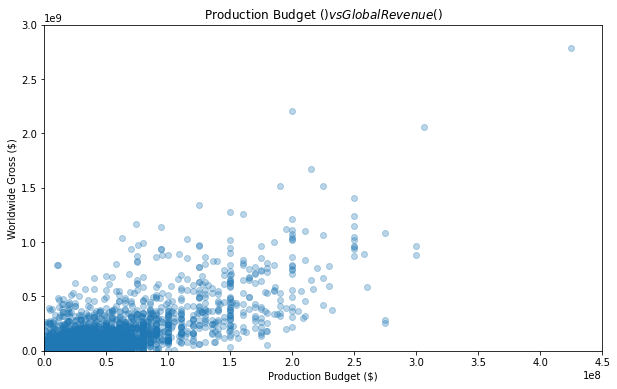

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.3)
plt.title("Production Budget ($) vs Global Revenue ($)")
plt.xlabel("Production Budget ($)")
plt.ylabel("Worldwide Gross ($)")
plt.xlim(0, 450000000)
plt.ylim(0, 3000000000)
plt.show()

### Train the Model

In [20]:
# Modelling

regression = LinearRegression()
regression.fit(X,y)

LinearRegression()

In [21]:
# Slope Coefficient

regression.coef_

array([[3.11150918]])

In [22]:
# Intercept

regression.intercept_

array([-7236192.72913963])

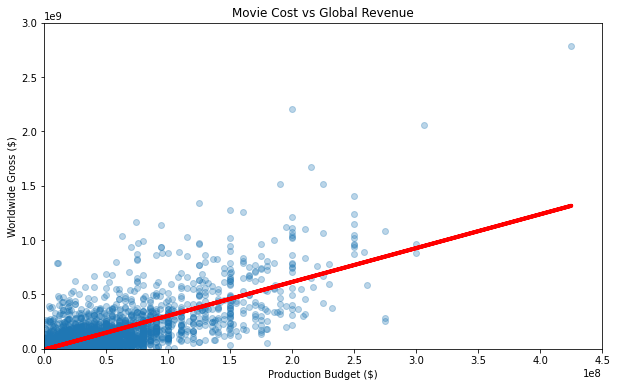

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.3)
plt.plot(X, regression.predict(X), color="red", linewidth=4)

plt.title("Movie Cost vs Global Revenue")
plt.xlabel("Production Budget ($)")
plt.ylabel("Worldwide Gross ($)")

plt.xlim(0, 450000000)
plt.ylim(0, 3000000000)

plt.show()

In [24]:
### Goodness of Fit (r_sqrd)

regression.score(X,y)

0.5496485356985729